In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
import pandas as pd 


In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [7]:
df.drop('petal length (cm)',axis='columns',inplace=True)

In [8]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal width (cm)
0                  5.1               3.5               0.2
1                  4.9               3.0               0.2
2                  4.7               3.2               0.2
3                  4.6               3.1               0.2
4                  5.0               3.6               0.2
..                 ...               ...               ...
145                6.7               3.0               2.3
146                6.3               2.5               1.9
147                6.5               3.0               2.0
148                6.2               3.4               2.3
149                5.9               3.0               1.8

[150 rows x 3 columns]>

In [9]:
df.drop('petal width (cm)',axis='columns',inplace=True)

In [10]:
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]>

In [11]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot as plt 
%matplotlib inline


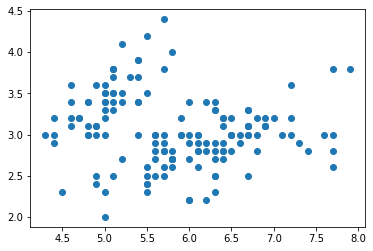

In [12]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [13]:
df.head(3)

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [16]:
k = KMeans(n_clusters=4)

In [17]:
k

KMeans(n_clusters=4)

In [18]:
k_predicted=k.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

In [19]:
k_predicted

array([2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 1, 1, 0, 1, 0, 1, 3, 1, 3, 3, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 3, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [21]:
df['cluster']=k_predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,2
1,4.9,3.0,3
2,4.7,3.2,3
3,4.6,3.1,3
4,5.0,3.6,2


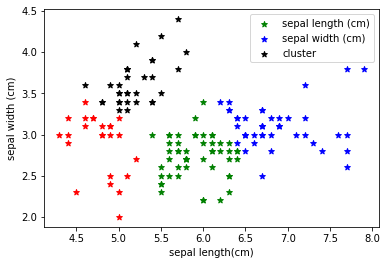

In [22]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]



plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='*')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='*')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='black',marker='*')
plt.scatter(df4['sepal length (cm)'],df4['sepal width (cm)'],color='red',marker='*')
plt.xlabel('sepal length(cm)')
plt.ylabel('sepal width (cm)')
plt.legend(df)

In [27]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    k = KMeans(n_clusters=k)
    k.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(k.inertia_)

In [28]:
sse

[130.4752666666667,
 58.204092789066756,
 37.0507021276596,
 27.966379045865942,
 21.052845463390145,
 17.332868563685626,
 14.815831630102675,
 12.890268281686392,
 11.182722397015509]

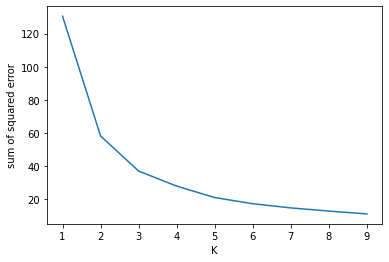

In [30]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)